# Part II - San Francisco Ford Go Bike Dataset Presentation.
## by Otim William Gerison

## Investigation Overview


> In the presentation, my key insights were tailored to how frequent trips occured by day and then by hour followed by a comparisn by the type of the user.

## Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The features in the dataset include the following:
duration_sec             
start_time               
end_time                  
start_station_id         
start_station_name       
start_station_latitude   
start_station_longitude 
end_station_id           
end_station_name        
end_station_latitude     
end_station_longitude   
bike_id               
user_type
member_birth_year
member_gender
bike_share_for_all_trip 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
df.dropna(inplace=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_id'] =df.bike_id.astype(str)

import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)
df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)

In [5]:
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)    

## Ride Distribution by Days 

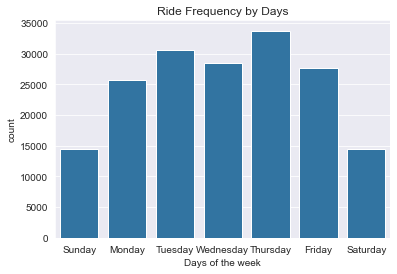

In [6]:
sb.set_style("darkgrid")
category_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday"]
sb.countplot(data = df, x = 'start_day', color = sb.color_palette()[0], order = category_order)
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

##### Majority of the rides were on Tuesday and Thursday whilst the least of them were on Saturday and Sunday.

## Ride Disribution by Hour of the Day

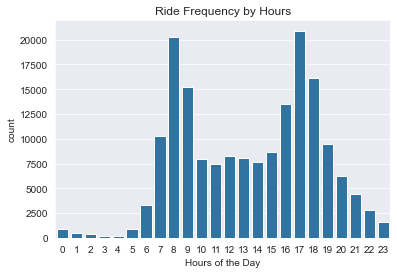

In [7]:
sb.countplot(data = df, x = 'start_hr', color = sb.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

##### Many of the rides took place at 8 in the morning and 5 in the evening which are typical of office arrival and departure times.

## Trip Duration by Segmentation



In [8]:
# Creating a function to handle labelling properties like xlabel, ylabel and title.
def properties_label(title, xlab, ylab):
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

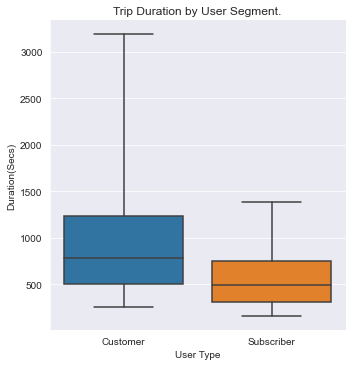

In [11]:
sb.catplot(x="user_type", y = "duration_sec", data = df, kind = "box",sym="", whis=[5,95])
properties_label("Trip Duration by User Segment.","User Type","Duration(Secs)")

##### Customers had longer trip durations than subscribers.

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
